In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler , MinMaxScaler, StandardScaler
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input,Flatten,Conv1D,MaxPooling1D
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from keras.layers import LSTM
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler


## Random Under-Sampling With Evaluation

In [2]:
df= pd.read_csv('heart2020python.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,8,4,2,1,2,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,13,4,0,1,2,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,10,4,2,1,4,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,12,4,0,0,3,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,5,4,0,1,2,8,0,0,0


In [3]:
df.drop(['DiffWalking',"SleepTime"],axis=1,inplace=True)
df.shape
df['HeartDisease'].value_counts()


HeartDisease
0    292422
1     27373
Name: count, dtype: int64

In [4]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

## splite data

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x = df.drop(["HeartDisease"] , axis = 1).values
y = df["HeartDisease"].values

In [7]:
rus = RandomUnderSampler(random_state=42)
x_rus, y_rus = rus.fit_resample(x, y)
x_train4, x_test4, y_train4, y_test4 = train_test_split(x_rus, y_rus, test_size=0.25, random_state=42)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train4 = scaler.fit_transform(x_train4)
x_test4 = scaler.transform(x_test4)
print(len(x_train4), len(y_train4))
print(len(x_test4), len(y_test4))

40407 40407
13469 13469


## Random forest

In [9]:


# Inicjalizacja modelu z domyślnymi parametrami
rf = RandomForestClassifier()

# Określenie siatki parametrów do przetestowania
param_grid = {
    'n_estimators': [100, 200, 300],  # Liczba drzew
    'max_depth': [10, 20, 30],        # Maksymalna głębokość drzewa
    'min_samples_split': [2, 4, 6],   # Minimalna liczba próbek wymagana do podziału węzła
    'min_samples_leaf': [1, 2, 4],    # Minimalna liczba próbek wymagana w liściu
    'max_features': ['auto', 'sqrt']  # Liczba cech do rozważenia przy każdym podziale
}

# Utworzenie obiektu GridSearchCV
cv_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Przeszukiwanie siatki parametrów
cv_rf.fit(x_train4, y_train4)

# Najlepszy zestaw parametrów
print("Najlepsze parametry: ", cv_rf.best_params_)

# Najlepszy estimator
best_rf = cv_rf.best_estimator_

# Predykcje i ocena modelu
ypred_train = best_rf.predict(x_train4)
ypred_test = best_rf.predict(x_test4)

print("Training Results\n")
print(classification_report(y_train4, ypred_train))
print("Testing Results\n")
print(classification_report(y_test4, ypred_test))


# Ocena modelu za pomocą walidacji krzyżowej
cross_val_scores = cross_val_score(best_rf, x_train4, y_train4, cv=5)
print("Cross-validation scores:", cross_val_scores)
print("Average cross-validation score:", np.mean(cross_val_scores))

Najlepsze parametry:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 300}
Training Results

              precision    recall  f1-score   support

           0       0.80      0.72      0.76     20189
           1       0.74      0.83      0.78     20218

    accuracy                           0.77     40407
   macro avg       0.77      0.77      0.77     40407
weighted avg       0.77      0.77      0.77     40407

Testing Results

              precision    recall  f1-score   support

           0       0.78      0.69      0.74      6749
           1       0.72      0.81      0.76      6720

    accuracy                           0.75     13469
   macro avg       0.75      0.75      0.75     13469
weighted avg       0.75      0.75      0.75     13469

Cross-validation scores: [0.75897055 0.76169265 0.75262963 0.75399084 0.75522831]
Average cross-validation score: 0.7565023966538256


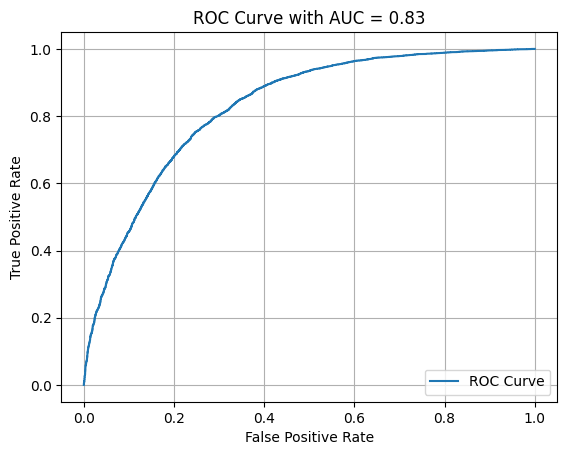

In [10]:

y_proba_test = best_rf.predict_proba(x_test4)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test4, y_proba_test)


plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test4, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## DECISION TREE CLASSIFIER

In [11]:

# Parametry do przetestowania w Grid Search
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

# Utworzenie modelu drzewa decyzyjnego
tree = DecisionTreeClassifier()

# Uruchomienie Grid Search z walidacją krzyżową
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train4, y_train4)

# Wyświetlenie najlepszych parametrów i wyników
print("Najlepsze parametry:", grid_search.best_params_)
print("Najlepsza dokładność:", grid_search.best_score_)

# Utworzenie i ocena modelu z najlepszymi parametrami
best_tree = grid_search.best_estimator_
best_tree.fit(x_train4, y_train4)

ypred_train2 = best_tree.predict(x_train4)
ypred_test2 = best_tree.predict(x_test4)

# Ocena modelu na zbiorze testowym

print("Training Results\n")
print(classification_report(y_train4, ypred_train2))
print('Testing Results\n')
print(classification_report(y_test4, ypred_test2))

# Dodatkowo: Walidacja krzyżowa dla najlepszego modelu na całym zbiorze danych
cross_val_scores = cross_val_score(best_tree, x_train4, y_train4, cv=5)
print("Cross-Validation Scores for the Best Model:", cross_val_scores)
print("Average Cross-Validation Score:", cross_val_scores.mean())

Najlepsze parametry: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5}
Najlepsza dokładność: 0.7425197596434591
Training Results

              precision    recall  f1-score   support

           0       0.80      0.73      0.76     20189
           1       0.75      0.81      0.78     20218

    accuracy                           0.77     40407
   macro avg       0.78      0.77      0.77     40407
weighted avg       0.78      0.77      0.77     40407

Testing Results

              precision    recall  f1-score   support

           0       0.76      0.69      0.72      6749
           1       0.72      0.78      0.75      6720

    accuracy                           0.74     13469
   macro avg       0.74      0.74      0.74     13469
weighted avg       0.74      0.74      0.74     13469

Cross-Validation Scores for the Best Model: [0.74251423 0.74659738 0.73926494 0.74013117 0.7431011 ]
Average Cross-Validation Score: 0.7423217643458473


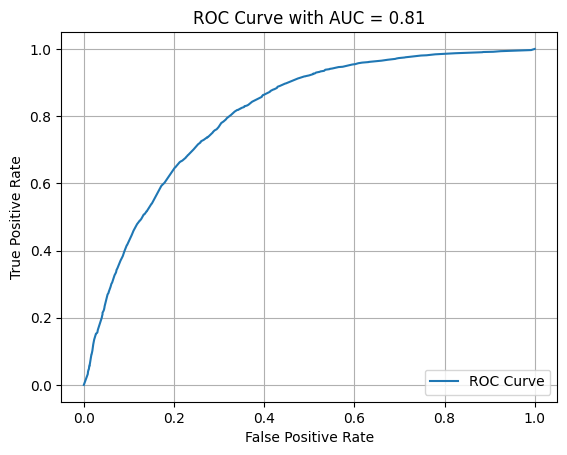

In [12]:

y_proba_test = best_tree.predict_proba(x_test4)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test4, y_proba_test)


plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test4, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Naive Bayes

In [13]:
Gnb = GaussianNB()
Gnb.fit(x_train4, y_train4)
ypred_train3 = Gnb.predict(x_train4)
y_pred_test3 = Gnb.predict(x_test4)

print("Naive Bayes Classifier Accuracy: ",accuracy_score(y_test4, y_pred_test3))

Naive Bayes Classifier Accuracy:  0.6983443462766352


In [14]:
print("Training Results\n")
print(classification_report(y_train4, ypred_train3))
print('Testing Results\n')
print(classification_report(y_test4, y_pred_test3))

Training Results

              precision    recall  f1-score   support

           0       0.67      0.81      0.73     20189
           1       0.76      0.60      0.67     20218

    accuracy                           0.70     40407
   macro avg       0.71      0.70      0.70     40407
weighted avg       0.71      0.70      0.70     40407

Testing Results

              precision    recall  f1-score   support

           0       0.67      0.80      0.73      6749
           1       0.75      0.60      0.66      6720

    accuracy                           0.70     13469
   macro avg       0.71      0.70      0.70     13469
weighted avg       0.71      0.70      0.70     13469



Cross-validation scores: [0.69611482 0.70390992 0.70300705 0.70251207 0.70115085]
Average cross-validation score: 0.7013389425876414


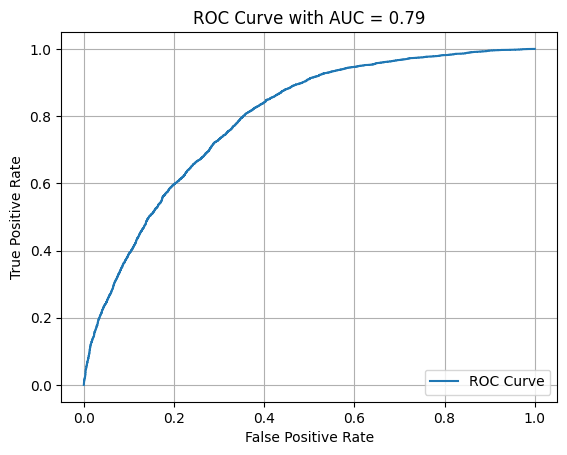

In [15]:
cross_val_scores = cross_val_score(Gnb, x_train4, y_train4, cv=5)
print("Cross-validation scores:", cross_val_scores)
print("Average cross-validation score:", np.mean(cross_val_scores))
y_proba_test = Gnb.predict_proba(x_test4)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test4, y_proba_test)


plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test4, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## XGBOSST


Najlepsze parametry:  {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Accuracy on Training set:  0.7627886257331651
Accuracy on Test set:  0.7555126586977504

Training Results

              precision    recall  f1-score   support

           0       0.79      0.72      0.75     20189
           1       0.74      0.80      0.77     20218

    accuracy                           0.76     40407
   macro avg       0.76      0.76      0.76     40407
weighted avg       0.76      0.76      0.76     40407

Testing Results

              precision    recall  f1-score   support

           0       0.78      0.71      0.74      6749
           1       0.73      0.80      0.77      6720

    accuracy                           0.76     13469
   macro avg       0.76      0.76      0.76     13469
weighted avg       0.76      0.76      0.76     13469



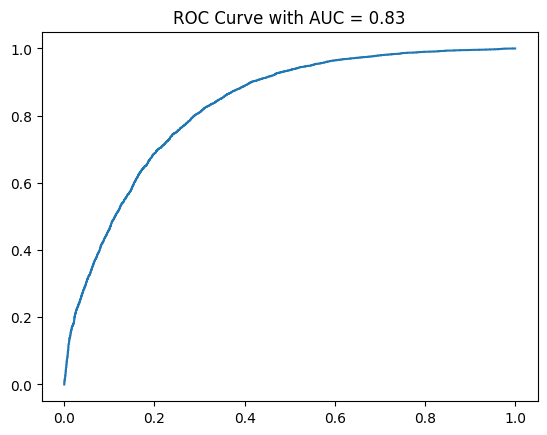

In [16]:
# Inicjalizacja modelu XGBoost
xg = XGBClassifier()

# Definiowanie siatki hiperparametrów do przetestowania
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Utworzenie obiektu GridSearchCV
grid_search = GridSearchCV(estimator=xg, param_grid=param_grid, cv=3, scoring='accuracy')

# Przeszukiwanie siatki parametrów
grid_search.fit(x_train4, y_train4)

# Najlepsze parametry i najlepszy model
print("Najlepsze parametry: ", grid_search.best_params_)
best_xg = grid_search.best_estimator_

# Predykcje na zbiorze treningowym i testowym
ypred_train4 = best_xg.predict(x_train4)
y_pred_test4 = best_xg.predict(x_test4)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train4, ypred_train4))
print("Accuracy on Test set: ", accuracy_score(y_test4, y_pred_test4))
print("\nTraining Results\n")
print(classification_report(y_train4, ypred_train4))
print('Testing Results\n')
print(classification_report(y_test4, y_pred_test4))

# cross_val_scores = cross_val_score(best_xg, x_train4, y_train4, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))

# Krzywa ROC
y_proba_test4 = best_xg.predict_proba(x_test4)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test4, y_proba_test4)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test4, y_proba_test4)))
plt.show()

## logistic regression

Najlepsze parametry:  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy on Training set:  0.7540277674660331
Accuracy on Test set:  0.7512807186873561

Training Results

              precision    recall  f1-score   support

           0       0.77      0.73      0.75     20189
           1       0.74      0.78      0.76     20218

    accuracy                           0.75     40407
   macro avg       0.75      0.75      0.75     40407
weighted avg       0.75      0.75      0.75     40407

Testing Results

              precision    recall  f1-score   support

           0       0.77      0.73      0.75      6749
           1       0.74      0.78      0.76      6720

    accuracy                           0.75     13469
   macro avg       0.75      0.75      0.75     13469
weighted avg       0.75      0.75      0.75     13469



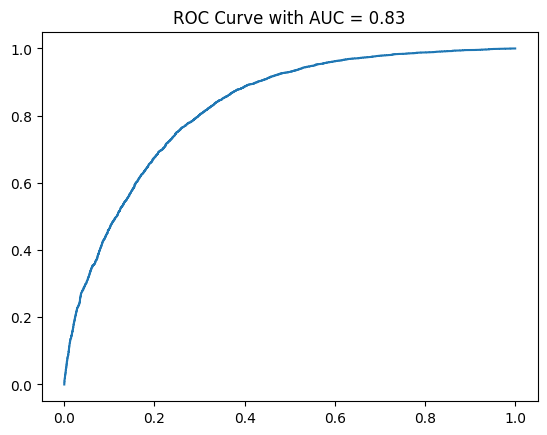

In [17]:
# Inicjalizacja modelu regresji logistycznej
lg = LogisticRegression()

# Definiowanie siatki hiperparametrów do przetestowania
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Parametr regularyzacji
    'penalty': ['l1', 'l2'],       # Typ regularyzacji
    'solver': ['liblinear']        # Algorytm optymalizacji (liblinear jest dobrym wyborem dla małych zbiorów danych)
}

# Utworzenie obiektu GridSearchCV
grid_search = GridSearchCV(estimator=lg, param_grid=param_grid, cv=5, scoring='accuracy')

# Przeszukiwanie siatki parametrów
grid_search.fit(x_train4, y_train4)

# Najlepsze parametry i najlepszy model
print("Najlepsze parametry: ", grid_search.best_params_)
best_lg = grid_search.best_estimator_

# Predykcje na zbiorze treningowym i testowym
ypred_train4 = best_lg.predict(x_train4)
y_pred_test4 = best_lg.predict(x_test4)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train4, ypred_train4))
print("Accuracy on Test set: ", accuracy_score(y_test4, y_pred_test4))
print("\nTraining Results\n")
print(classification_report(y_train4, ypred_train4))
print('Testing Results\n')
print(classification_report(y_test4, y_pred_test4))

# cross_val_scores = cross_val_score(best_lg, x_train4, y_train4, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))

# Krzywa ROC
y_proba_test4 = best_lg.predict_proba(x_test4)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test4, y_proba_test4)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test4, y_proba_test4)))
plt.show()

## GradientBoostingClassifier

In [18]:
# Inicjalizacja modelu Gradient Boosting Classifier
gb = GradientBoostingClassifier()

# Definiowanie siatki hiperparametrów do przetestowania
param_grid = {
    'n_estimators': [100, 200, 300],  # Liczba drzew w ensemble
    'learning_rate': [0.01, 0.1, 0.2], # Szybkość uczenia
    'max_depth': [3, 5, 7],            # Maksymalna głębokość drzewa
    'min_samples_split': [2, 4],       # Minimalna liczba próbek wymagana do podziału węzła
    'min_samples_leaf': [1, 2]         # Minimalna liczba próbek w liściu
}

# Utworzenie obiektu GridSearchCV
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy')

# Przeszukiwanie siatki parametrów
grid_search.fit(x_train4, y_train4)

# Najlepsze parametry i najlepszy model
print("Najlepsze parametry: ", grid_search.best_params_)
best_gb = grid_search.best_estimator_

# Predykcje na zbiorze treningowym i testowym
ypred_train6 = best_gb.predict(x_train4)
y_pred_test6 = best_gb.predict(x_test4)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train4, ypred_train6))
print("Accuracy on Test set: ", accuracy_score(y_test4, y_pred_test6))
print("\nTraining Results\n")
print(classification_report(y_train4, ypred_train6))
print('Testing Results\n')
print(classification_report(y_test4, y_pred_test6))


# cross_val_scores = cross_val_score(best_gb, x_train4, y_train4, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))
# Krzywa ROC
y_proba_test6 = best_gb.predict_proba(x_test4)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test4, y_proba_test6)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test4, y_proba_test6)))
plt.show()

KeyboardInterrupt: 

## KNN

In [19]:
knn = KNeighborsClassifier()
knn.fit(x_train4, y_train4)


KNeighborsClassifier()

In [20]:
grid_cv = GridSearchCV(KNeighborsClassifier(), 
                       param_grid={
                           "n_neighbors": range(1, 50)
                       }, cv=5, scoring="f1", 
                       verbose=1, n_jobs=6)


In [21]:
grid_cv.fit(x_train4, 
            y_train4)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=6,
             param_grid={'n_neighbors': range(1, 50)}, scoring='f1', verbose=1)

In [22]:
grid_cv.best_score_

0.7593006953229925

In [23]:
knn = grid_cv.best_estimator_
knn

KNeighborsClassifier(n_neighbors=43)

In [24]:
ypred_train7 = grid_cv.predict(x_train4)
y_pred_test7 = grid_cv.predict(x_test4)
print("XGBClassifier Accuracy: ",accuracy_score(y_test4, y_pred_test7))

XGBClassifier Accuracy:  0.7429653277897394


In [25]:
print("Training Results\n")
print(classification_report(y_train4, ypred_train7))
print("Testing Results\n")
print(classification_report(y_test4, y_pred_test7))

Training Results

              precision    recall  f1-score   support

           0       0.79      0.71      0.75     20189
           1       0.74      0.81      0.77     20218

    accuracy                           0.76     40407
   macro avg       0.76      0.76      0.76     40407
weighted avg       0.76      0.76      0.76     40407

Testing Results

              precision    recall  f1-score   support

           0       0.77      0.69      0.73      6749
           1       0.72      0.80      0.76      6720

    accuracy                           0.74     13469
   macro avg       0.75      0.74      0.74     13469
weighted avg       0.75      0.74      0.74     13469



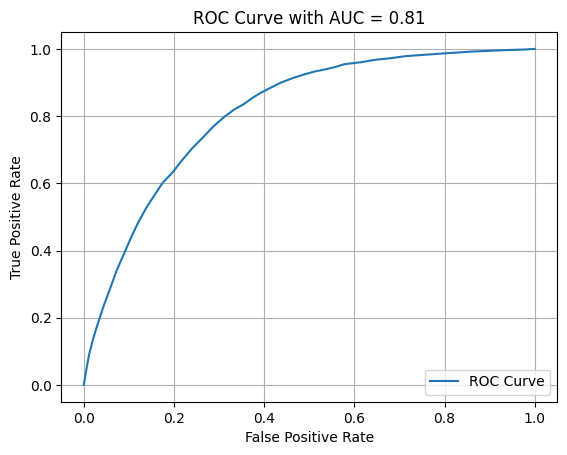

In [26]:
# cross_val_scores = cross_val_score(grid_cv, x_train4, y_train4, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))
y_proba_test = grid_cv.predict_proba(x_test4)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test4, y_proba_test)


plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test4, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## SIECI NEURONOWE

## ANN

In [27]:
ann = tf.keras.models.Sequential()

In [28]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)


In [29]:
ann.add(tf.keras.layers.Dense(units=16, activation='relu'))

In [30]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [31]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [32]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [33]:
ann.fit(x_train4, y_train4, batch_size = 32, epochs=100,
          validation_data=(x_test4, y_test4), verbose=1,
          callbacks=[early_stop])

Epoch 1/100


1263/1263 [==============================] - 3s 2ms/step - loss: 0.5560 - accuracy: 0.7178 - val_loss: 0.5237 - val_accuracy: 0.7447
Epoch 2/100
1263/1263 [==============================] - 2s 2ms/step - loss: 0.5087 - accuracy: 0.7527 - val_loss: 0.5150 - val_accuracy: 0.7510
Epoch 3/100
1263/1263 [==============================] - 2s 2ms/step - loss: 0.5049 - accuracy: 0.7546 - val_loss: 0.5137 - val_accuracy: 0.7528
Epoch 4/100
1263/1263 [==============================] - 2s 2ms/step - loss: 0.5030 - accuracy: 0.7550 - val_loss: 0.5153 - val_accuracy: 0.7521
Epoch 5/100
1263/1263 [==============================] - 2s 2ms/step - loss: 0.5021 - accuracy: 0.7559 - val_loss: 0.5116 - val_accuracy: 0.7539
Epoch 6/100
1263/1263 [==============================] - 2s 2ms/step - loss: 0.5015 - accuracy: 0.7583 - val_loss: 0.5104 - val_accuracy: 0.7541
Epoch 7/100
1263/1263 [==============================] - 2s 1ms/step - loss: 0.5005 - accuracy: 0.7580 - val_loss: 0.5118 - val_

In [34]:
ypred_train8 = ann.predict(x_train4)
y_pred_test8 = ann.predict(x_test4)

y_pred_test8 = (y_pred_test8 > 0.5)
ypred_train8 = (ypred_train8 > 0.5)
print(np.concatenate((y_pred_test8.reshape(len(y_pred_test8),1), y_test4.reshape(len(y_test4),1)),1))

421/421 [==============================] - 0s 708us/step
[[0 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]


In [35]:
accuracy_score(y_test4, y_pred_test8)

0.751874675180043

In [36]:
print("Training Results\n")
print(classification_report(y_train4, ypred_train8))
print('Testing Results\n')
print(classification_report(y_test4, y_pred_test8))

Training Results



              precision    recall  f1-score   support

           0       0.77      0.74      0.76     20189
           1       0.75      0.78      0.76     20218

    accuracy                           0.76     40407
   macro avg       0.76      0.76      0.76     40407
weighted avg       0.76      0.76      0.76     40407

Testing Results

              precision    recall  f1-score   support

           0       0.76      0.73      0.75      6749
           1       0.74      0.77      0.76      6720

    accuracy                           0.75     13469
   macro avg       0.75      0.75      0.75     13469
weighted avg       0.75      0.75      0.75     13469



421/421 [==============================] - 0s 805us/step


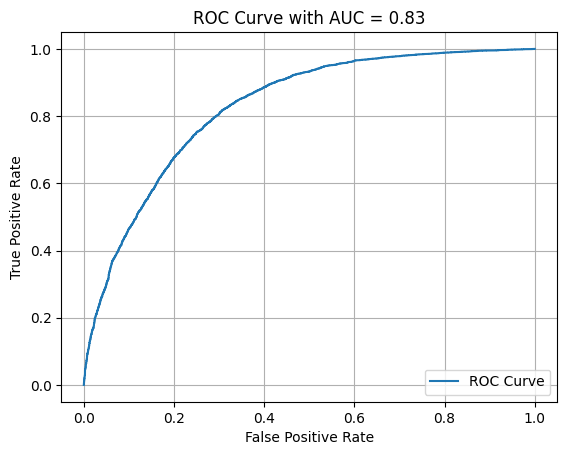

In [37]:
# cross_val_scores = cross_val_score(ann, x_train4, y_train4, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))
y_proba_test = ann.predict(x_test4).flatten()


fpr, tpr, thresholds = roc_curve(y_test4, y_proba_test)


plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test4, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inna proba 

In [38]:

tf.random.set_seed(42)


model2 = tf.keras.Sequential([
  tf.keras.layers.Dense(16,activation = 'relu'),
  tf.keras.layers.Dense(32,activation = 'relu'),
  tf.keras.layers.Dense(16,activation = 'relu'),
  tf.keras.layers.Dense(9,activation = 'relu'),
  tf.keras.layers.Dense(1,activation = 'sigmoid')                            
])


model2.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])


history_2 = model2.fit(x_train4,y_train4,epochs = 100)

Epoch 1/100
1263/1263 [==============================] - 2s 1ms/step - loss: 0.5366 - accuracy: 0.7294
Epoch 2/100
1263/1263 [==============================] - 1s 1ms/step - loss: 0.5052 - accuracy: 0.7529
Epoch 3/100
1263/1263 [==============================] - 1s 1ms/step - loss: 0.5029 - accuracy: 0.7567
Epoch 4/100
1263/1263 [==============================] - 1s 1ms/step - loss: 0.5017 - accuracy: 0.7561
Epoch 5/100
1263/1263 [==============================] - 1s 1ms/step - loss: 0.5011 - accuracy: 0.7569
Epoch 6/100
1263/1263 [==============================] - 1s 1ms/step - loss: 0.4997 - accuracy: 0.7582
Epoch 7/100
1263/1263 [==============================] - 1s 1ms/step - loss: 0.4998 - accuracy: 0.7584
Epoch 8/100
1263/1263 [==============================] - 1s 985us/step - loss: 0.4987 - accuracy: 0.7587
Epoch 9/100
1263/1263 [==============================] - 1s 986us/step - loss: 0.4987 - accuracy: 0.7592
Epoch 10/100
1263/1263 [==============================] - 1s 983us/st

In [39]:
model2.evaluate(x_test4,y_test4)

421/421 [==============================] - 0s 800us/step - loss: 0.5160 - accuracy: 0.7521


[0.5160095691680908, 0.7520974278450012]

In [40]:
ypred_train22 = model2.predict(x_train4)
y_pred_test22 = model2.predict(x_test4)

y_pred_test22 = (y_pred_test22 > 0.5)
ypred_train22 = (ypred_train22 > 0.5)
print("Training Results\n")
print(classification_report(y_train4,ypred_train22))
print("Testing Results\n")
print(classification_report(y_test4,y_pred_test22))

421/421 [==============================] - 0s 755us/step
Training Results

              precision    recall  f1-score   support

           0       0.79      0.73      0.76     20189
           1       0.75      0.81      0.78     20218

    accuracy                           0.77     40407
   macro avg       0.77      0.77      0.77     40407
weighted avg       0.77      0.77      0.77     40407

Testing Results

              precision    recall  f1-score   support

           0       0.78      0.71      0.74      6749
           1       0.73      0.79      0.76      6720

    accuracy                           0.75     13469
   macro avg       0.75      0.75      0.75     13469
weighted avg       0.75      0.75      0.75     13469



421/421 [==============================] - 0s 827us/step


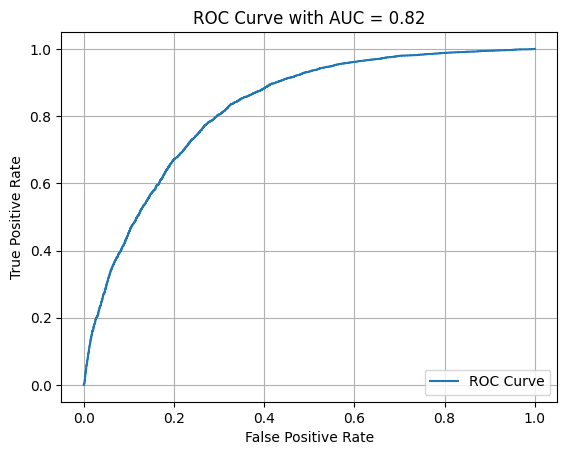

In [41]:
# cross_val_scores = cross_val_score(model_22, x_train4, y_train4, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))
y_proba_test = model2.predict(x_test4).flatten()


fpr, tpr, thresholds = roc_curve(y_test4, y_proba_test)


plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test4, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inne próby sieci neuronowych 

In [42]:

tf.random.set_seed(42)



model3 = tf.keras.Sequential([
  tf.keras.layers.Dense(16,activation = 'relu'),
  tf.keras.layers.Dense(6,activation = 'relu'),
  tf.keras.layers.Dense(6,activation = 'relu'),
  tf.keras.layers.Dense(1,activation = 'sigmoid')                            
])


model3.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])


history_2 = model3.fit(x_train4,y_train4,epochs = 100)

Epoch 1/100
1263/1263 [==============================] - 2s 962us/step - loss: 0.5687 - accuracy: 0.7089
Epoch 2/100
1263/1263 [==============================] - 1s 1ms/step - loss: 0.5059 - accuracy: 0.7532
Epoch 3/100
1263/1263 [==============================] - 1s 1ms/step - loss: 0.5033 - accuracy: 0.7550
Epoch 4/100
1263/1263 [==============================] - 1s 1ms/step - loss: 0.5022 - accuracy: 0.7548
Epoch 5/100
1263/1263 [==============================] - 1s 1ms/step - loss: 0.5017 - accuracy: 0.7573
Epoch 6/100
1263/1263 [==============================] - 1s 1ms/step - loss: 0.5007 - accuracy: 0.7559
Epoch 7/100
1263/1263 [==============================] - 1s 1ms/step - loss: 0.5006 - accuracy: 0.7566
Epoch 8/100
1263/1263 [==============================] - 1s 957us/step - loss: 0.4999 - accuracy: 0.7570
Epoch 9/100
1263/1263 [==============================] - 1s 971us/step - loss: 0.4999 - accuracy: 0.7569
Epoch 10/100
1263/1263 [==============================] - 1s 990us/

In [43]:
model3.evaluate(x_test4,y_test4)

421/421 [==============================] - 1s 963us/step - loss: 0.5084 - accuracy: 0.7546


[0.5083605051040649, 0.7546217441558838]

In [44]:
ypred_train11 = model3.predict(x_train4)
y_pred_test11 = model3.predict(x_test4)

y_pred_test11 = (y_pred_test11 > 0.5)
ypred_train11 = (ypred_train11 > 0.5)
print("Training Results\n")
print(classification_report(y_train4,ypred_train11))
print("Testing Results\n")
print(classification_report(y_test4,y_pred_test11))

421/421 [==============================] - 0s 898us/step
Training Results

              precision    recall  f1-score   support

           0       0.79      0.71      0.75     20189
           1       0.74      0.81      0.77     20218

    accuracy                           0.76     40407
   macro avg       0.76      0.76      0.76     40407
weighted avg       0.76      0.76      0.76     40407

Testing Results

              precision    recall  f1-score   support

           0       0.79      0.70      0.74      6749
           1       0.73      0.81      0.77      6720

    accuracy                           0.75     13469
   macro avg       0.76      0.75      0.75     13469
weighted avg       0.76      0.75      0.75     13469



421/421 [==============================] - 0s 846us/step


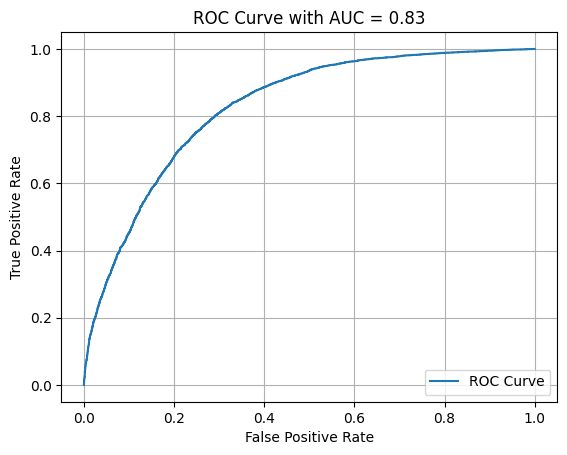

In [45]:
# cross_val_scores = cross_val_score(model_2, x_train4, y_train4, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))
y_proba_test = model3.predict(x_test4).flatten()


fpr, tpr, thresholds = roc_curve(y_test4, y_proba_test)


plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test4, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inne próby sieci neuronowych 

In [46]:
model4 = Sequential()
model4.add(Dense(units=16,activation='relu'))
model4.add(Dropout(0.5))

model4.add(Dense(units=15,activation='relu'))
model4.add(Dropout(0.5))

model4.add(Dense(units=1,activation='sigmoid'))
model4.compile(loss='binary_crossentropy', optimizer='adam')

In [47]:
model4.fit(x=x_train4, 
          y=y_train4, 
          epochs=100,
          validation_data=(x_test4, y_test4), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100
1263/1263 [==============================] - 3s 2ms/step - loss: 0.6226 - val_loss: 0.5537
Epoch 2/100
1263/1263 [==============================] - 2s 2ms/step - loss: 0.5681 - val_loss: 0.5296
Epoch 3/100
1263/1263 [==============================] - 2s 1ms/step - loss: 0.5545 - val_loss: 0.5272
Epoch 4/100
1263/1263 [==============================] - 2s 1ms/step - loss: 0.5466 - val_loss: 0.5218
Epoch 5/100
1263/1263 [==============================] - 2s 1ms/step - loss: 0.5427 - val_loss: 0.5187
Epoch 6/100
1263/1263 [==============================] - 2s 1ms/step - loss: 0.5398 - val_loss: 0.5224
Epoch 7/100
1263/1263 [==============================] - 2s 1ms/step - loss: 0.5352 - val_loss: 0.5166
Epoch 8/100
1263/1263 [==============================] - 2s 1ms/step - loss: 0.5342 - val_loss: 0.5176
Epoch 9/100
1263/1263 [==============================] - 2s 1ms/step - loss: 0.5347 - val_loss: 0.5163
Epoch 10/100
1263/1263 [==============================] - 2s 1ms/step - l

In [48]:
ypred_train12 = model4.predict(x_train4)
y_pred_test12 = model4.predict(x_test4)

y_pred_test12 = (y_pred_test12 > 0.5)
ypred_train12 = (ypred_train12 > 0.5)
print("Training Results\n")
print(classification_report(y_train4,ypred_train12))
print("Testing Results\n")
print(classification_report(y_test4,y_pred_test12))

421/421 [==============================] - 0s 970us/step
Training Results

              precision    recall  f1-score   support

           0       0.79      0.71      0.74     20189
           1       0.73      0.81      0.77     20218

    accuracy                           0.76     40407
   macro avg       0.76      0.76      0.76     40407
weighted avg       0.76      0.76      0.76     40407

Testing Results

              precision    recall  f1-score   support

           0       0.78      0.70      0.74      6749
           1       0.73      0.81      0.76      6720

    accuracy                           0.75     13469
   macro avg       0.75      0.75      0.75     13469
weighted avg       0.75      0.75      0.75     13469



421/421 [==============================] - 0s 976us/step


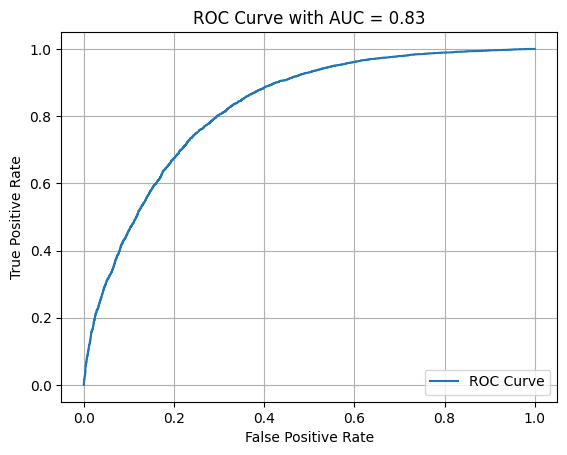

In [49]:
# cross_val_scores = cross_val_score(model1, x_train4, y_train4, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))
y_proba_test = model4.predict(x_test4).flatten()


fpr, tpr, thresholds = roc_curve(y_test4, y_proba_test)


plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test4, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inny model

In [50]:
model5 = Sequential()



model5.add(Dense(16,  activation='relu'))
model5.add(Dropout(0.2))

model5.add(Dense(10, activation='relu'))
model5.add(Dropout(0.2))

model5.add(Dense(units=1,activation='sigmoid'))

model5.compile(loss='binary_crossentropy', optimizer='adam')

In [51]:
model5.fit(x=x_train4, 
          y=y_train4, 
          epochs=100,
          validation_data=(x_test4, y_test4), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100
1263/1263 [==============================] - 3s 2ms/step - loss: 0.5848 - val_loss: 0.5271
Epoch 2/100
1263/1263 [==============================] - 2s 2ms/step - loss: 0.5364 - val_loss: 0.5206
Epoch 3/100
1263/1263 [==============================] - 2s 2ms/step - loss: 0.5270 - val_loss: 0.5169
Epoch 4/100
1263/1263 [==============================] - 2s 2ms/step - loss: 0.5226 - val_loss: 0.5160
Epoch 5/100
1263/1263 [==============================] - 2s 2ms/step - loss: 0.5201 - val_loss: 0.5132
Epoch 6/100
1263/1263 [==============================] - 2s 2ms/step - loss: 0.5183 - val_loss: 0.5156
Epoch 7/100
1263/1263 [==============================] - 2s 2ms/step - loss: 0.5160 - val_loss: 0.5112
Epoch 8/100
1263/1263 [==============================] - 2s 2ms/step - loss: 0.5140 - val_loss: 0.5105
Epoch 9/100
1263/1263 [==============================] - 2s 2ms/step - loss: 0.5144 - val_loss: 0.5093
Epoch 10/100
1263/1263 [==============================] - 2s 2ms/step - l

In [52]:
ypred_train13 = model5.predict(x_train4)
y_pred_test13 = model5.predict(x_test4)

y_pred_test13 = (y_pred_test13 > 0.5)
ypred_train13 = (ypred_train13 > 0.5)

print("Training Results\n")
print(classification_report(y_train4,ypred_train13))
print("Testing Results\n")
print(classification_report(y_test4,y_pred_test13))

421/421 [==============================] - 0s 861us/step
Training Results

              precision    recall  f1-score   support

           0       0.78      0.73      0.75     20189
           1       0.75      0.79      0.77     20218

    accuracy                           0.76     40407
   macro avg       0.76      0.76      0.76     40407
weighted avg       0.76      0.76      0.76     40407

Testing Results

              precision    recall  f1-score   support

           0       0.77      0.72      0.74      6749
           1       0.74      0.78      0.76      6720

    accuracy                           0.75     13469
   macro avg       0.75      0.75      0.75     13469
weighted avg       0.75      0.75      0.75     13469



421/421 [==============================] - 0s 940us/step


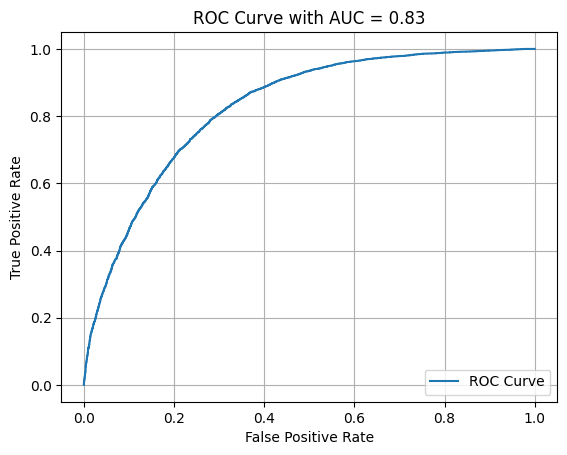

In [53]:
# cross_val_scores = cross_val_score(model2, x_train4, y_train4, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))
y_proba_test = model5.predict(x_test4).flatten()


fpr, tpr, thresholds = roc_curve(y_test4, y_proba_test)


plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test4, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## SVC

In [54]:
model3 = SVC(probability=True)

In [55]:
model3.fit(x_train4,y_train4)

SVC(probability=True)

In [56]:
ypred_train14 = model3.predict(x_train4)
y_pred_test14 = model3.predict(x_test4)

print("Training Results\n")
print(classification_report(y_train4,ypred_train14))
print("Testing Results\n")
print(classification_report(y_test4,y_pred_test14))

Training Results

              precision    recall  f1-score   support

           0       0.79      0.71      0.75     20189
           1       0.74      0.81      0.77     20218

    accuracy                           0.76     40407
   macro avg       0.77      0.76      0.76     40407
weighted avg       0.77      0.76      0.76     40407

Testing Results

              precision    recall  f1-score   support

           0       0.78      0.70      0.74      6749
           1       0.73      0.81      0.76      6720

    accuracy                           0.75     13469
   macro avg       0.75      0.75      0.75     13469
weighted avg       0.75      0.75      0.75     13469



In [57]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [58]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [59]:
grid.fit(x_train4,y_train4)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.757 total time=  39.6s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.757 total time=  30.5s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.754 total time=  31.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.749 total time=  37.9s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.747 total time=  28.8s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.758 total time=  31.4s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.758 total time=  38.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.754 total time=  21.4s


KeyboardInterrupt: 

In [ ]:
grid.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
grid.best_estimator_

SVC(C=100, gamma=0.1)

In [ ]:
ypred_train = grid.predict(x_train4)
y_pred_test = grid.predict(x_test4)

print("Training Results\n")
print(classification_report(y_train4,ypred_train))
print("Test Results\n")
print(classification_report(y_test4,y_pred_test))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75     20189
           1       0.74      0.82      0.78     20218

    accuracy                           0.76     40407
   macro avg       0.77      0.76      0.76     40407
weighted avg       0.77      0.76      0.76     40407

              precision    recall  f1-score   support

           0       0.78      0.70      0.74      6749
           1       0.73      0.81      0.76      6720

    accuracy                           0.75     13469
   macro avg       0.76      0.75      0.75     13469
weighted avg       0.76      0.75      0.75     13469



Training Results

              precision    recall  f1-score   support

           0       0.79      0.71      0.75     20189
           1       0.74      0.82      0.78     20218

    accuracy                           0.76     40407
   macro avg       0.77      0.76      0.76     40407
weighted avg       0.77      0.76      0.76     40407

Testing Results

              precision    recall  f1-score   support

           0       0.78      0.70      0.74      6749
           1       0.73      0.81      0.76      6720

    accuracy                           0.75     13469
   macro avg       0.76      0.75      0.75     13469
weighted avg       0.76      0.75      0.75     13469



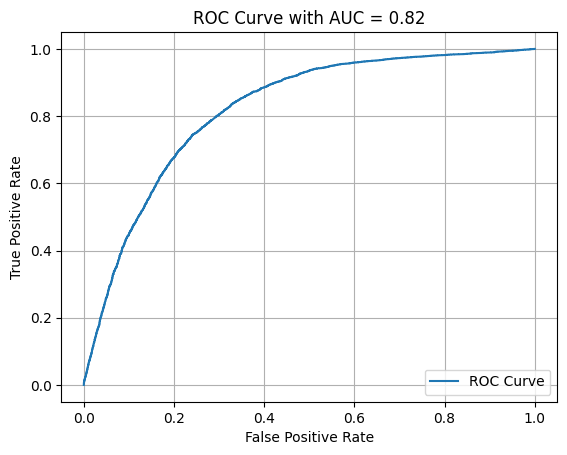

In [60]:
model3 = SVC(C=100, gamma=0.1, kernel='rbf', probability=True)
model3.fit(x_train4, y_train4)


ypred_train14 = model3.predict(x_train4)
y_pred_test14 = model3.predict(x_test4)


print("Training Results\n")
print(classification_report(y_train4, ypred_train14))
print("Testing Results\n")
print(classification_report(y_test4, y_pred_test14))

y_proba_test = model3.predict_proba(x_test4)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test4, y_proba_test)

# cross_val_scores = cross_val_score(model3, x_train4, y_train4, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test4, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()